<a href="https://colab.research.google.com/github/bhosalemahesh899/AIPractice/blob/main/Sentimentanalysis_on_Bo%20no%20nutral%20gussing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install -U pip setuptools

  Using cached pip-24.2-py3-none-any.whl.metadata (3.6 kB)
  Using cached setuptools-75.1.0-py3-none-any.whl.metadata (6.9 kB)
Using cached pip-24.2-py3-none-any.whl (1.8 MB)
Using cached setuptools-75.1.0-py3-none-any.whl (1.2 MB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 71.0.4
    Uninstalling setuptools-71.0.4:
      Successfully uninstalled setuptools-71.0.4
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


In [1]:
pip install concrete-ml transformers datasets

INFO: pip is looking at multiple versions of onnxconverter-common to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 MB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 130.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 124.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 678.1/678.1 kB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 115.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 129.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 42.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 129.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 57.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.

In [5]:
pip install datasets==2.12.0

INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
  Attempting uninstall: dill
    Found existing installation: dill 0.3.8
    Uninstalling dill-0.3.8:
      Successfully uninstalled dill-0.3.8
  Attempting uninstall: multiprocess
    Found existing installation: multiprocess 0.70.16
    Uninstalling multiprocess-0.70.16:
      Successfully uninstalled multiprocess-0.70.16
  Attempting uninstall: datasets
    Found existing installation: datasets 3.0.0
    Uninstalling datasets-3.0.0:
      Successfully uninstalled datasets-3.0.0


In [3]:
!pip install datasets --upgrade
from datasets import load_dataset

# Load dataset from a local file
# train = load_dataset('csv', data_files={'train': 'Tweets.csv'}, split='train')['train'].to_pandas()
train = load_dataset("osanseviero/twitter-airline-sentiment")["train"].to_pandas()

text_X = train['text']
y = train['airline_sentiment']
y = y.replace(['negative', 'neutral', 'positive'], [0, 1, 2])
pos_ratio = y.value_counts()[2] / y.value_counts().sum()
neg_ratio = y.value_counts()[0] / y.value_counts().sum()
neutral_ratio = y.value_counts()[1] / y.value_counts().sum()
print(f'Proportion of positive examples: {round(pos_ratio * 100, 2)}%')
print(f'Proportion of negative examples: {round(neg_ratio * 100, 2)}%')
print(f'Proportion of neutral examples: {round(neutral_ratio * 100, 2)}%')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/3.75k [00:00<?, ?B/s]

Tweets.csv:   0%|          | 0.00/3.42M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/14640 [00:00<?, ? examples/s]

Proportion of positive examples: 16.14%
Proportion of negative examples: 62.69%
Proportion of neutral examples: 21.17%


In [4]:
from sklearn.model_selection import train_test_split
text_X_train, text_X_test, y_train, y_test = train_test_split(text_X, y,
    test_size=0.1, random_state=42)

In [5]:
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer
device = "cuda:0" if torch.cuda.is_available() else "cpu"
# Load the tokenizer (converts text to tokens)
tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment-latest")

# Load the pre-trained model
transformer_model = AutoModelForSequenceClassification.from_pretrained(
   "cardiffnlp/twitter-roberta-base-sentiment-latest"
)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [6]:
import numpy as np
import tqdm
# Function that transforms a list of texts to their representation
# learned by the transformer.
def text_to_tensor(
   list_text_X_train: list,
   transformer_model: AutoModelForSequenceClassification,
   tokenizer: AutoTokenizer,
   device: str,
) -> np.ndarray:
   # Tokenize each text in the list one by one
   tokenized_text_X_train_split = []
   tokenized_text_X_train_split = [
       tokenizer.encode(text_x_train, return_tensors="pt")
       for text_x_train in list_text_X_train
   ]

   # Send the model to the device
   transformer_model = transformer_model.to(device)
   output_hidden_states_list = [None] * len(tokenized_text_X_train_split)

   for i, tokenized_x in enumerate(tqdm.tqdm(tokenized_text_X_train_split)):
       # Pass the tokens through the transformer model and get the hidden states
       # Only keep the last hidden layer state for now
       output_hidden_states = transformer_model(tokenized_x.to(device), output_hidden_states=True)[
           1
       ][-1]
       # Average over the tokens axis to get a representation at the text level.
       output_hidden_states = output_hidden_states.mean(dim=1)
       output_hidden_states = output_hidden_states.detach().cpu().numpy()
       output_hidden_states_list[i] = output_hidden_states

   return np.concatenate(output_hidden_states_list, axis=0)


In [7]:
# Let's vectorize the text using the transformer
list_text_X_train = text_X_train.tolist()
list_text_X_test = text_X_test.tolist()

X_train_transformer = text_to_tensor(list_text_X_train, transformer_model, tokenizer, device)
X_test_transformer = text_to_tensor(list_text_X_test, transformer_model, tokenizer, device)


100%|██████████| 1464/1464 [04:23<00:00,  5.55it/s]


In [8]:
from concrete.ml.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV
# Let's build our model
model = XGBClassifier()

# A gridsearch to find the best parameters
parameters = {
    "n_bits": [2, 3],
    "max_depth": [1],
    "n_estimators": [10, 30, 50],
    "n_jobs": [-1],
}

# Now we have a representation for each tweet, we can train a model on these.
grid_search = GridSearchCV(model, parameters, cv=5, n_jobs=1, scoring="accuracy")
grid_search.fit(X_train_transformer, y_train)

# Check the accuracy of the best model
print(f"Best score: {grid_search.best_score_}")

# Check best hyperparameters
print(f"Best parameters: {grid_search.best_params_}")

# Extract best model
best_model = grid_search.best_estimator_

No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'


Best score: 0.8367480196836677
Best parameters: {'max_depth': 1, 'n_bits': 3, 'n_estimators': 30, 'n_jobs': -1}


Accuracy: 0.8456


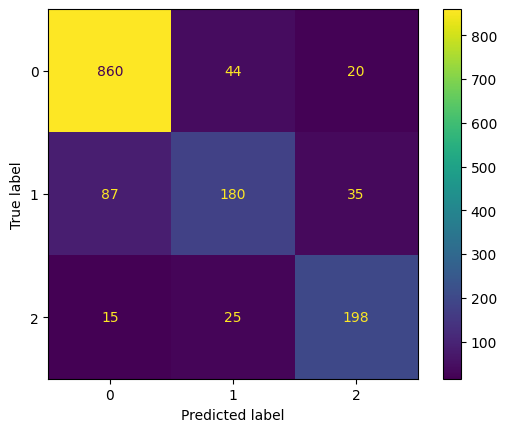

In [10]:
#from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix # Import the missing confusion_matrix function

# Compute the metrics on the test set
y_pred = best_model.predict(X_test_transformer)
y_proba = best_model.predict_proba(X_test_transformer)

# Compute and plot the confusion matrix
matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix).plot()

# Compute the accuracy
accuracy_transformer_xgboost = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy_transformer_xgboost:.4f}")